# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [170]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [171]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [172]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [173]:
# YOUR CODE HERE
print("\nTipos de datos del DataFrame temp:")
print(temp.dtypes)


Tipos de datos del DataFrame temp:
City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [174]:
# YOUR CODE HERE
ny_temp = temp[temp['State'] == 'New York']['Temperature']
ny_temp

0    19.444444
1     9.444444
2     3.333333
Name: Temperature, dtype: float64

#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [175]:
# YOUR CODE HERE
ny_temp_mean = temp[temp['State'] == 'New York']['Temperature'].mean()
ny_temp_mean

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [176]:
# your answer here
cities_states_15 = temp[temp['Temperature'] > 15]
cities_states_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [177]:
# YOUR CODE HERE
cities_above_15 = cities_states_15[['City']]
cities_above_15

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [178]:
# YOUR CODE HERE
cities_between_15_and_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
cities_between_15_and_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [179]:
# YOUR CODE HERE
state_temp_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
state_temp_stats

,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [180]:
# YOUR CODE HERE
employee = pd.read_csv('Employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [181]:
# YOUR CODE HERE
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

Text(0.5, 1.0, 'Distribución de Salarios')

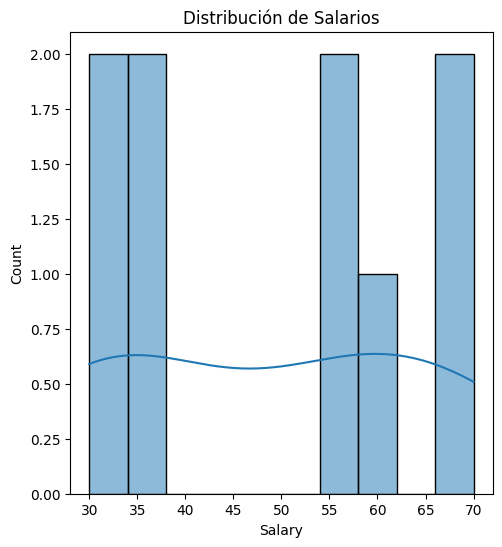

In [182]:
# your answer here
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(employee['Salary'], bins=10, kde=True)
plt.title('Distribución de Salarios')

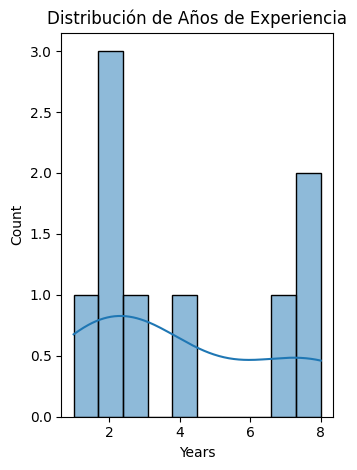

In [183]:
# YOUR CODE HERE
plt.subplot(1, 2, 2)
sns.histplot(employee['Years'], bins=10, kde=True)
plt.title('Distribución de Años de Experiencia')
plt.tight_layout()
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [184]:
# YOUR CODE HERE
salary_mean = employee['Salary'].mean()
salary_mean

48.888888888888886

#### ¿Cuál es el salario más alto?

In [185]:
# YOUR CODE HERE
salary_max = employee['Salary'].max()
salary_max

70

#### ¿Cuál es el salario más bajo?

In [186]:
# YOUR CODE HERE
salary_min = employee['Salary'].min()
salary_min

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [187]:
# YOUR CODE HERE
lowest_salary = employee.sort_values(by='Salary',ascending=True)
lowest_salary.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35


In [188]:
#o solo nombre y salario
lowest = lowest_salary[['Name', 'Salary']]
lowest.head(3)

,Name,Salary
1,Maria,30
2,David,30
0,Jose,35


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [189]:
# YOUR CODE HERE
david_info = employee[employee['Name'] == 'David']
david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [190]:
# YOUR CODE HERE
david_salary = david_info['Salary'].values[0]
david_salary

30

#### Printea todas las líneas en las que el cargo es asociado

In [191]:
# YOUR CODE HERE
associates_info = employee[employee['Title'] == 'associate']
associates_info

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [192]:
# YOUR CODE HERE
first_three_rows_1 = employee.head(3)
first_three_rows_1

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [193]:
# YOUR CODE HERE
first_three_rows_2 = employee.iloc[:3]
first_three_rows_2

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [194]:
# YOUR CODE HERE
high_salary_associates = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
high_salary_associates

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [195]:
# YOUR CODE HERE
salary_by_years = employee.groupby('Years')['Salary'].mean().reset_index()
salary_by_years

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [196]:
# YOUR CODE HERE
salary_by_title = employee.groupby('Title')['Salary'].mean().reset_index()
salary_by_title

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

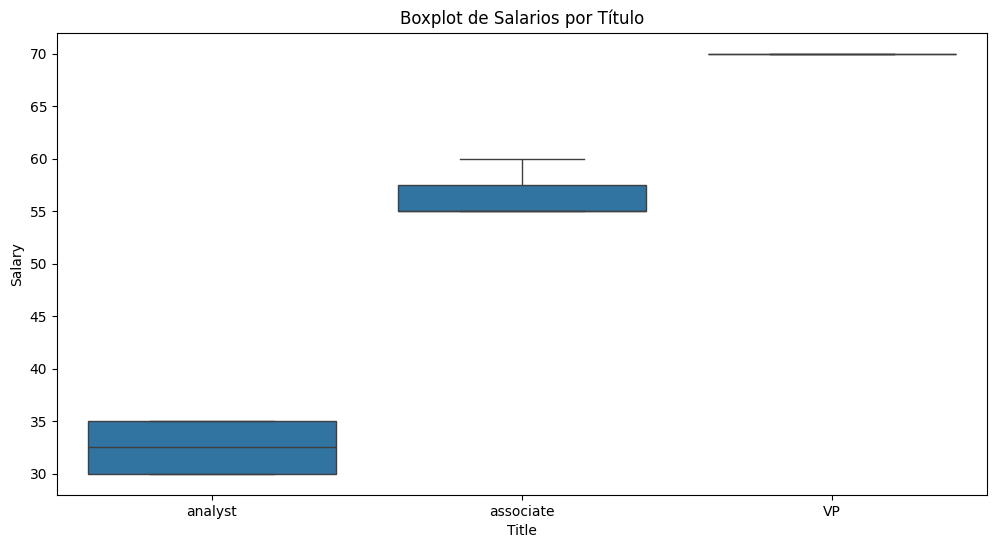

In [197]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=employee)
plt.title('Boxplot de Salarios por Título')
plt.show()

In [198]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
q1

35.0

In [199]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
q3

60.0

#### ¿Es diferente el salario medio por género?

In [200]:
# your answer here
salary_by_gender = employee.groupby('Gender')['Salary'].mean().reset_index()
salary_by_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [201]:
# your answer here
dept_stats = employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],
    'Salary': ['min', 'mean', 'max']
}).reset_index()
dept_stats

Department Years               Salary           
               min      mean max    min   mean max
0         HR     2  4.666667   8     30  45.00  70
1         IT     1  4.500000   8     30  48.75  70
2      Sales     2  2.500000   3     55  55.00  55

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [202]:
# your answer here
salary_diff_by_dept = employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min()).reset_index()
salary_diff_by_dept.columns = ['Department', 'Salary Range']
salary_diff_by_dept

,Department,Salary Range
0,HR,40
1,IT,40
2,Sales,0


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [203]:
# your answer here
orders_df = pd.read_csv('Orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [204]:
# your answer here
orders_df.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [205]:
# your answer here
orders_df.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

#### ¿Cuál es el precio medio de compra?

In [206]:
# your answer here
orders_df['amount_spent'].mean()

22.394748504739596

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [207]:
# your answer here
orders_df['amount_spent'].max()

168469.6

In [208]:
# your answer here
orders_df['amount_spent'].min()

0.0

#### Seleccione todos los clientes que tenemos en España

In [209]:
# your answer here
clientes_españa = orders_df[orders_df['Country']== 'Spain']
clientes_españa

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [210]:
# your answer here
clientes_españa['Country'].value_counts()

Country
Spain    2485
Name: count, dtype: int64

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [211]:
# your answer here
customer_total_purchases = orders_df.groupby('CustomerID')['Quantity'].sum()
customer_more_than_50 = customer_total_purchases[customer_total_purchases > 50]
customer_more_than_50.count()

4091

#### Selecciona pedidos de España superiores a 50 artículos

In [212]:
# your answer here
clientes_españa_agrupados = clientes_españa.groupby('CustomerID')['Quantity'].sum()
clientes_españa_mas_50 = clientes_españa_agrupados[clientes_españa_agrupados > 50]
clientes_españa_mas_50

CustomerID
12354     530
12417     267
12421     484
12442     182
12445      62
12448     243
12450     128
12454    1006
12455     566
12462     536
12484    2191
12502     820
12507     905
12510     353
12538     191
12539    2067
12540    6685
12541     680
12544     136
12545     523
12546     633
12547     134
12550     569
12551     100
12556     358
12557    4384
12596     474
12597    2236
17097     459
Name: Quantity, dtype: int64

#### Seleccionar todos los pedidos gratuitos

In [213]:
# your answer here
pedidos_gratuitos = orders_df[orders_df['amount_spent']== 0]
pedidos_gratuitos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [214]:
# your answer here
lunch_bag_purchases = orders_df[orders_df['Description'].str.contains('lunch bag', case=False, na=False)]
lunch_bag_purchases

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [215]:
# your answer here
lunch_bag_purchases_2011 = lunch_bag_purchases[lunch_bag_purchases['year'] == 2011]
lunch_bag_purchases_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

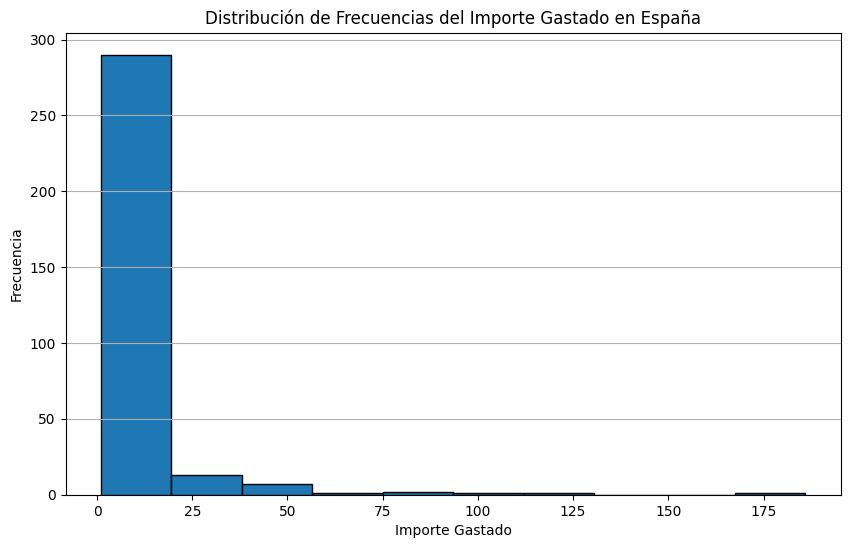

In [216]:
# your answer here
spain_orders = orders_df[orders_df['Country'] == 'Spain']
amount_distribution_spain = spain_orders['amount_spent'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(amount_distribution_spain, bins=10, edgecolor='black')
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [217]:
# your answer here
august_orders = orders_df[orders_df['month'] == 8]
print("\nPedidos realizados en el mes de agosto:")
print(august_orders)



Pedidos realizados en el mes de agosto:
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00  

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [218]:
# your answer here
august_orders_by_country = august_orders['Country'].value_counts()
print("\nNúmero de pedidos por país en el mes de agosto:")
print(august_orders_by_country)


Número de pedidos por país en el mes de agosto:
Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### ¿Cuál es el gasto medio por país?

In [219]:
# your answer here
mean_spent_by_country = orders_df.groupby('Country')['amount_spent'].mean()
print("\nGasto medio por país:")
print(mean_spent_by_country)


Gasto medio por país:
Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                     

#### ¿Cuál es el artículo más caro?

In [220]:
# your answer here
most_expensive_item = orders_df.loc[orders_df['UnitPrice'].idxmax()]
print("\nArtículo más caro:")
print(most_expensive_item)


Artículo más caro:
Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### ¿Cuál fue la cantidad media gastada al año?

In [221]:
# your answer here
mean_spent_per_year = orders_df.groupby('year')['amount_spent'].mean()
print("\nCantidad media gastada al año:")
print(mean_spent_per_year)


Cantidad media gastada al año:
year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
